1) Inicialmente vou gerar um random entre 5 e 35 watts entre 00h00 e 07h00
2)  Diminuir 12h00 e aumentar 13h00
3)  Diminuir após as 17h00

In [1]:
import random
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

1) Definindo o consumo médio (Wh) e o desvio médio de consumo
2) Consumo de energia: 165 watts (máximo), 0,5 watt (standby)

In [2]:
averageConsumption = 165
superiorDeviation = -140
lowerDeviation = -160

Dias e quantidade de medições por dia

In [3]:
days = 365
measurementsPerDay = 24

Parâmetros de data inicial

In [4]:
initialYear = 2010
initialDay = 1
initialMonth = 1
actualYear = datetime.now().year

In [5]:
print(f"Quantidade de dias analisados: {(actualYear - initialYear) * days}")

Quantidade de dias analisados: 4745


Calculando a diferença de dias entre o ano inicial e o ano atual

In [6]:
numDays = (actualYear - initialYear) * 365
# Gerando os dados de data e hora
start_date = datetime(initialYear, initialMonth, initialDay)
end_date = start_date + timedelta(days=numDays)
date = pd.date_range(start_date, end_date, freq='H')

In [7]:
# Criando uma lista para armazenar os dados
data = []
# Gerando os dados para cada hora
current_date = start_date

Criando os dados aleatórios

In [8]:
while current_date < end_date:
  getHour = current_date.hour

  # TODO: Fazer um if-else de hora pra caso chegue em horários específico eu aumente ou diminua o consumo

  #* Considerando horário comum de começo de expediente
  if getHour == 7 or getHour == 17:
    superiorDeviation = -80
    lowerDeviation = -60

  elif getHour == 8 or getHour == 13:
    superiorDeviation = 0
    lowerDeviation = -10

  elif getHour == 12:
    superiorDeviation = -60
    lowerDeviation = -40

  elif getHour == 21:
    superiorDeviation = -140
    lowerDeviation = -160

  # Gerando um consumo aleatório com desvio médio
  consumption = round(random.uniform(averageConsumption + superiorDeviation, averageConsumption + lowerDeviation), 3)
  # Criando um registro com a data e o consumo
  record = {
    'Datetime': current_date.strftime('%Y-%m-%d %H:%M:%S'),
    'kWh': consumption
  }

  # Adicionando o registro à lista de dados
  data.append(record)

  # Avançando para a próxima hora
  current_date += timedelta(hours=1)

# Criando um DataFrame com os dados
df = pd.DataFrame(data)

Salvando o DataFrame em um arquivo Excel de extensão CSV

In [10]:
df.to_csv('../data/consumo_televisao.csv', index=False)

Pegando o dataset

In [ ]:
df = pd.read_csv('../data/consumo_televisao.csv')

Plotando o gráfico do arquivo criado

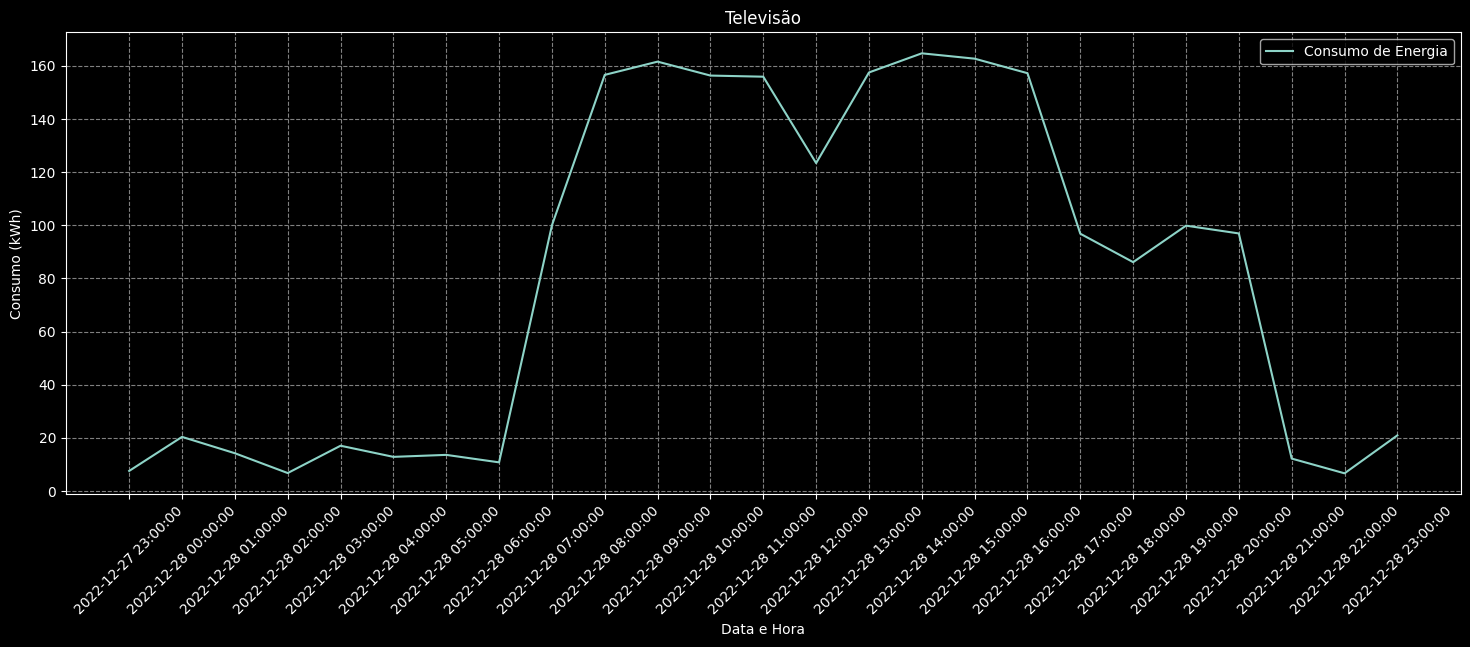

In [18]:
plt.figure(figsize=(18, 6))
plt.plot(df['Datetime'][-25:], df['kWh'][-25:], label='Consumo de Energia')
plt.xlabel('Data e Hora')
plt.ylabel('Consumo (kWh)')
plt.title('Televisão')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, color='gray', linestyle='dashed', linewidth=0.8)

# Exibindo o gráfico
plt.show()